# Exercise 1

We first load a dataset and examine its dimensions.

In [2]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

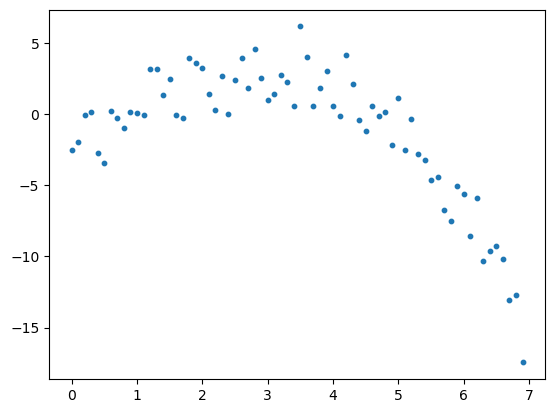

In [4]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
x_data = xy_data[:, 0]
y_data = xy_data[:, 1]

plt.scatter(x_data, y_data, s=10)
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [5]:
def polyreg(data_matrix, k):
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    N = np.shape(data_matrix)[0]
    x_data = data_matrix[:, 0]
    y_data = data_matrix[:, 1]

    if k < N:
        Xk = np.vander(x_data, k+1, increasing=True)
    else:
        Xk = np.vander(x_data, N, increasing=True)

    beta= np.linalg.lstsq(Xk, y_data, rcond=None)[0]
    fit = Xk.dot(beta)
    resid = y_data - fit
    return [beta, fit, resid]   

Use the tests below to check the outputs of the function you have written:

In [6]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

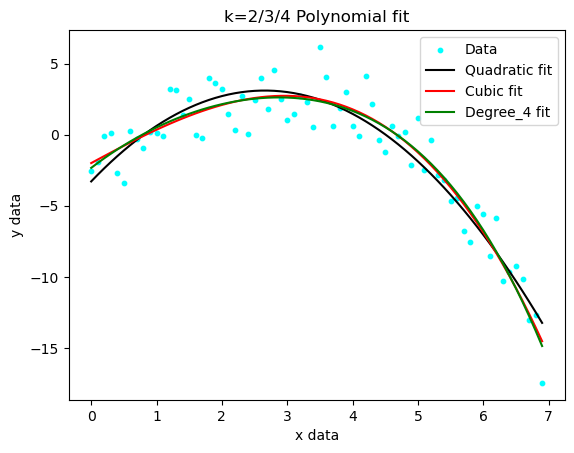

SSE for  2 th order fit is:  172.181
R**2 value for  2 th order fit is:  0.888
SSE for  3 th order fit is:  152.406
R**2 value for  3 th order fit is:  0.901
SSE for  4 th order fit is:  151.228
R**2 value for  4 th order fit is:  0.901


In [7]:
#Your code here
beta = []
fit = []
resid = []
for k in range(2, 5):
    beta.append(polyreg(xy_data, k)[0])
    fit.append(polyreg(xy_data, k)[1])
    resid.append(polyreg(xy_data, k)[2])

plt.scatter(x_data, y_data,s=10, color = 'cyan', label = 'Data')
plt.plot(x_data, fit[0], color = 'black', label = 'Quadratic fit')
plt.plot(x_data, fit[1], color = 'red', label = 'Cubic fit')
plt.plot(x_data, fit[2], color = 'green', label = 'Degree_4 fit')

plt.xlabel('x data')
plt.ylabel('y data')
plt.title('k=2/3/4 Polynomial fit')
plt.legend(fontsize = 'medium')

plt.show()

sse_0 = np.linalg.norm(polyreg(xy_data, 0)[2])**2
for k in range(len(resid)):
    sse_k = np.round(np.linalg.norm(resid[k]) ** 2, 3)
    print("SSE for ", k+2, "th order fit is: ", sse_k)
    r_2_k = np.round(1 - (sse_k/sse_0), 3)
    print("R**2 value for ", k+2, "th order fit is: ", r_2_k)


 #### State which model you choose and briefly justify your choice.
 
 
I would choose k=3 fit, because it gives a better result than 2nd order fit (11% decrease in SSE, slight increase in R**2), and it is not very different to the result of 4th order fit, which makes it the best option among the three fits for a memory-efficient polynomial regression fit.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

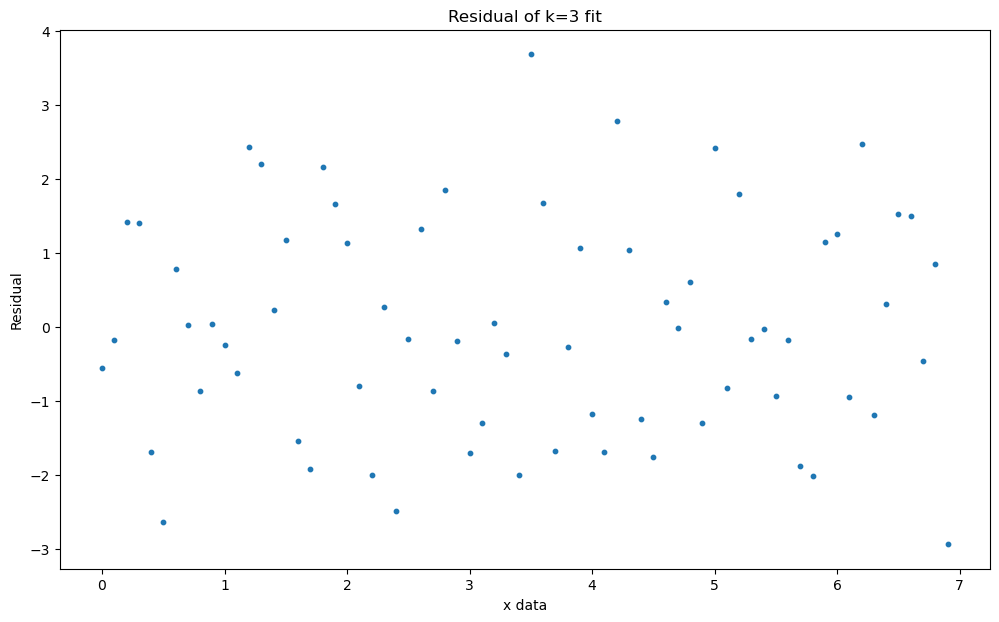

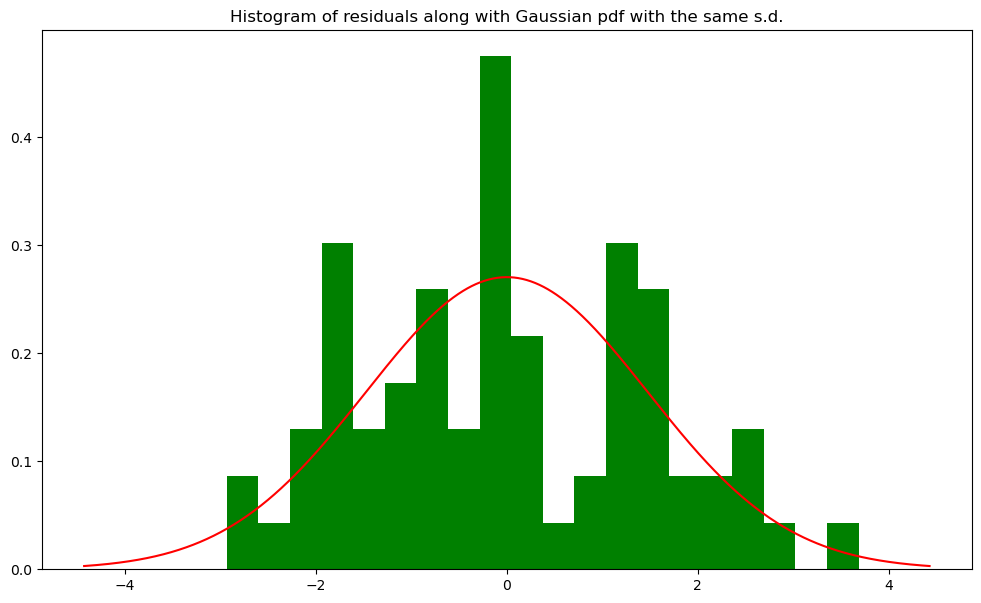

In [11]:
#Your code here
from scipy.stats import norm

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(x_data, resid[1], s=10)
plt.xlabel('x data')
plt.ylabel('Residual')
plt.title('Residual of k=3 fit')
plt.show()

n, bins, patches = plt.hist(resid[1], bins=20, density=True, facecolor='green')
res_stdev = np.std(resid[1])
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.title('Histogram of residuals along with Gaussian pdf with the same s.d.')
plt.show()

